# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

[[ 0.   1.   0. ]
 [ 0.   0.   1. ]
 [-0.5 -2.  -2.5]]


---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Współczynniki w1(x): [-6. 11. -6.  1.]
Pierwiastki policzone z a1: [1. 2. 3.]
Współczynniki w2(x) policzone.


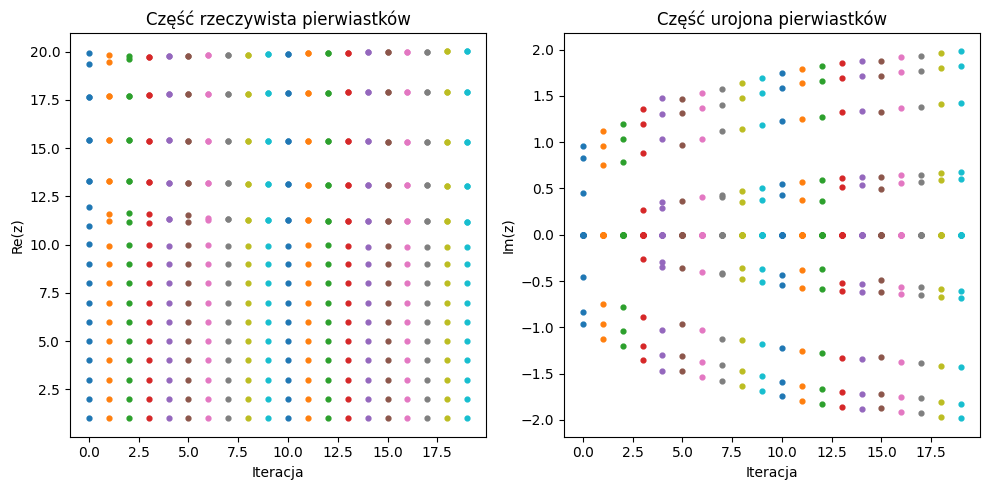


Średnia wrażliwość każdego pierwiastka:
x =  1   średnia zmiana ≈ 5.502e-13
x =  2   średnia zmiana ≈ 7.002e-11
x =  3   średnia zmiana ≈ 4.310e-09
x =  4   średnia zmiana ≈ 1.352e-07
x =  5   średnia zmiana ≈ 2.459e-06
x =  6   średnia zmiana ≈ 2.900e-05
x =  7   średnia zmiana ≈ 2.453e-04
x =  8   średnia zmiana ≈ 1.562e-03
x =  9   średnia zmiana ≈ 7.589e-03
x = 10   średnia zmiana ≈ 2.835e-02
x = 11   średnia zmiana ≈ 1.037e-01
x = 12   średnia zmiana ≈ 2.126e-01
x = 13   średnia zmiana ≈ 5.079e-01
x = 14   średnia zmiana ≈ 6.605e-01
x = 15   średnia zmiana ≈ 8.653e-01
x = 16   średnia zmiana ≈ 9.111e-01
x = 17   średnia zmiana ≈ 8.573e-01
x = 18   średnia zmiana ≈ 6.994e-01
x = 19   średnia zmiana ≈ 2.256e-01
x = 20   średnia zmiana ≈ 5.390e-02


In [ ]:
# ===== Twoja implementacja tutaj =====
def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    """Wyznacza miejsca zerowe wielomianu po lekkim zaburzeniu współczynników."""
    if not isinstance(coef, np.ndarray):
        return None
    if coef.ndim != 1 or coef.size == 0:
        return None

    coef = coef + np.random.random_sample(coef.shape) * 1e-10
    roots = nppoly.polyroots(coef)
    return coef, roots


# PUNKT 1 — wielomian w1(x)


# wektor pierwiastków
roots_w1 = np.array([1, 2, 3])

# liczymy współczynniki
a1 = nppoly.polyfromroots(roots_w1)

print("Współczynniki w1(x):", a1)


roots_w2 = np.arange(1, 21)
a2 = nppoly.polyfromroots(roots_w2)

print("Współczynniki w2(x) policzone.")


# PUNKT 3 — 20 iteracji zaburzania współczynników i rysowania pierwiastków

plt.figure(figsize=(10, 5))

# podział na 2 wykresy
plt.subplot(1, 2, 1)
plt.title("Część rzeczywista pierwiastków")
plt.xlabel("Iteracja")
plt.ylabel("Re(z)")

plt.subplot(1, 2, 2)
plt.title("Część urojona pierwiastków")
plt.xlabel("Iteracja")
plt.ylabel("Im(z)")


coef_current = a2.copy()

for i in range(20):
    perturbed, roots_est = roots_20(coef_current)

    re = np.real(roots_est)
    im = np.imag(roots_est)

    # rysowanie
    plt.subplot(1, 2, 1)
    plt.scatter([i] * len(re), re, s=12)

    plt.subplot(1, 2, 2)
    plt.scatter([i] * len(im), im, s=12)

    # nowy punkt startowy
    coef_current = perturbed


plt.tight_layout()
plt.show()


# PUNKT 3 — analiza wrażliwości pierwiastków

# policzenie średniej zmienności pierwiastków
N = 2000
deviations = np.zeros(20)

for k in range(N):
    _, r = roots_20(a2)
    deviations += np.abs(np.sort(r) - np.sort(roots_w2))

deviations /= N

print("\nŚrednia wrażliwość każdego pierwiastka:")
for i, d in enumerate(deviations, start=1):
    print(f"x = {i:2d}   średnia zmiana ≈ {d:.3e}")



---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Współczynniki w3(x):
[  1.  -8.  28. -56.  70. -56.  28.  -8.   1.]

Macierz Frobeniusa F_w3:
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]

Pierwiastki — metoda eig():
[1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]

Pierwiastki — rozkład Schura:
[1.0179862  1.01272357 1.01272357 1.0000072  1.0000072  0.98727648
 0.98727648 0.98199929]

Pierwiastki — polyroots():
[0.97789688-0.00901967j 0.97789688+0.00901967j 0.99051571-0.02210196j
 0.99051571+0.02210196j 1.00901686-0.02256938j 1.00901686+0.02256938j
 1.02257054-0.00948709j 1.02257054+0.00948709j]


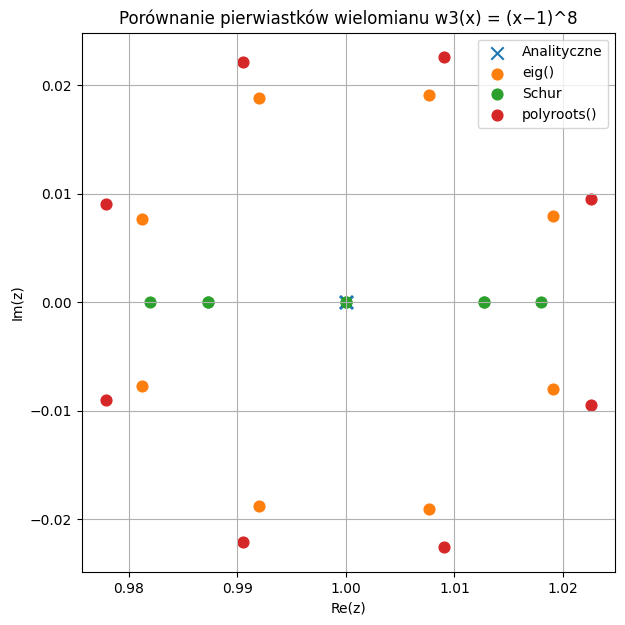

In [ ]:
# ===== Twoja implementacja tutaj =====
def frob_a(a: np.ndarray) -> np.ndarray | None:
    if not isinstance(a, np.ndarray) or a.ndim != 1 or len(a) < 2:
        return None
    if a[-1] == 0:
        return None

    n = len(a) - 1
    F = np.zeros((n, n))
    F[:-1, 1:] = np.eye(n - 1)
    F[-1, :] = -a[:-1] / a[-1]
    return F


# PUNKT 1 – Wielomian w3(x) = (x – 1)^8

# Pierwiastki analityczne
roots_w3 = np.ones(8)

# Współczynniki wielomianu
coef_w3 = nppoly.polyfromroots(roots_w3)

print("Współczynniki w3(x):")
print(coef_w3)

# Macierz Frobeniusa
F_w3 = frob_a(coef_w3)
print("\nMacierz Frobeniusa F_w3:")
print(F_w3)


# ----------------------------------------------------------
# PUNKT 2 – Obliczanie pierwiastków różnymi metodami
# ----------------------------------------------------------

# 1. Wartości własne macierzy Frobeniusa
eigvals_direct = np.linalg.eigvals(F_w3)

# 2. Rozkład Schura
T, Z = sp.linalg.schur(F_w3)
eigvals_schur = np.diag(T)

# 3. Pierwiastki uzyskane przez nppoly.polyroots()
eigvals_poly = nppoly.polyroots(coef_w3)

print("\nPierwiastki — metoda eig():")
print(eigvals_direct)

print("\nPierwiastki — rozkład Schura:")
print(eigvals_schur)

print("\nPierwiastki — polyroots():")
print(eigvals_poly)


# ----------------------------------------------------------
# PUNKT 3 – Wykres porównujący wyniki
# ----------------------------------------------------------

plt.figure(figsize=(7, 7))

# analityczne
plt.scatter(np.real(roots_w3), np.imag(roots_w3),
            label="Analityczne", s=80, marker='x')

# eigvals()
plt.scatter(np.real(eigvals_direct), np.imag(eigvals_direct),
            label="eig()", s=60)

# schur()
plt.scatter(np.real(eigvals_schur), np.imag(eigvals_schur),
            label="Schur", s=60)

# polyroots()
plt.scatter(np.real(eigvals_poly), np.imag(eigvals_poly),
            label="polyroots()", s=60)

plt.title("Porównanie pierwiastków wielomianu w3(x) = (x−1)^8")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', 'box')

plt.show()
"""
Wszystkie metody powinny teoretycznie dawać 8-krotny pierwiastek x=1.
Jednakże macierz Frobeniusa jest źle uwarunkowana przy wielokrotnych pierwiastkach
Dlatego metody eig() i Schura zwykle mocno rozrzucają wartości wokół 1.
polyroots() jest zwykle stabilniejsze, ale też daje odchylenia.
Problem dobrze ilustruje, jak źle uwarunkowane jest szukanie pierwiastków wielomianów wysokiego stopnia.
"""

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

[[ 0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.        ]
 [-0.06584362  0.2962963   0.11522634 -2.2962963   4.07407407 -3.22222222
   2.        ]]

Pierwiastki i residua |w(z)|:

-- eig(Frobenius) --
  5.55111512313e-17+1.41421356237j   |w(z)|=1.291e-11
  5.55111512313e-17-1.41421356237j   |w(z)|=1.291e-11
  -0.333333333333+0j   |w(z)|=8.882e-14
  0.666671741455+0j   |w(z)|=1.954e-14
  0.666664129272+4.39477169323e-06j   |w(z)|=2.487e-14
  0.666664129272-4.39477169323e-06j   |w(z)|=2.487e-14
  0.333333333333+0j   |w(z)|=1.776e-14

-- Schur diag(T) --
  -1.249000902

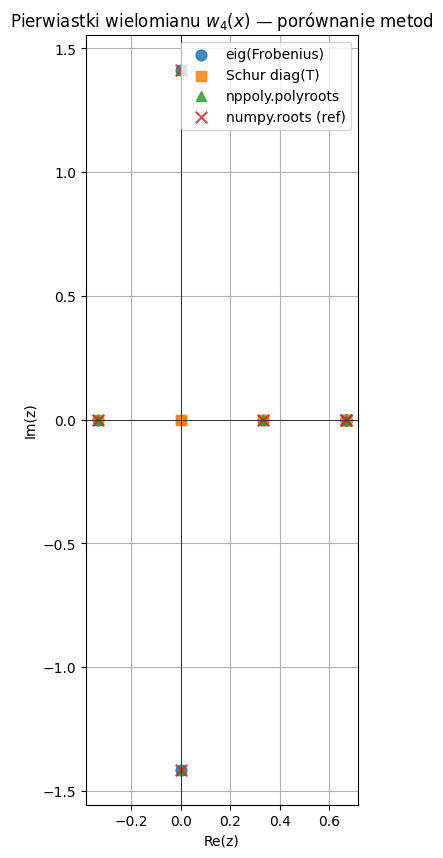

In [ ]:
# ===== Twoja implementacja tutaj =====
coef_w4 = np.array([16, -72, -28, 558, -990, 783, -486, 243], dtype=float)

# Macierz Frobeniusa

F_w4 = frob_a(coef_w4)
print(F_w4)


# Metody wyznaczania pierwiastków

# 1) wartości własne macierzy Frobeniusa
eig_frob = np.linalg.eigvals(F_w4)

# 2) rozkład Schura -> wartości na diag(T)
T, Z = sp.linalg.schur(F_w4)
eig_schur = np.diag(T)

# 3) nppoly.polyroots (oczekuje coef w formacie [a0..a_n])
roots_nppoly = nppoly.polyroots(coef_w4)

# 4) numpy.roots (wymaga [a_n ... a_0])
roots_numpy = np.roots(coef_w4[::-1])


# Funkcja pomocnicza: wartość wielomianu w punkcie z (współczynniki [a0..a_n])

def poly_value(coef_a0_an, z):
    # np.polyval wymaga od najwyższej potęgi
    return np.polyval(coef_a0_an[::-1], z)

# Residua (|w(z)|) i raport

methods = {
    "eig(Frobenius)": eig_frob,
    "Schur diag(T)": eig_schur,
    "nppoly.polyroots": roots_nppoly,
    "numpy.roots (ref)": roots_numpy
}

print("\nPierwiastki i residua |w(z)|:")
for name, rts in methods.items():
    print(f"\n-- {name} --")
    for r in rts:
        res = abs(poly_value(coef_w4, r))
        print(f"  {r.real:.12g}{'+' if r.imag>=0 else '-'}{abs(r.imag):.12g}j   |w(z)|={res:.3e}")


# Porównanie metod względem numpy.roots (referencja)
# dopasujemy wektory po posortowaniu wg (Re, Im)

def sort_by_real_im(arr):
    return np.array(sorted(arr, key=lambda v: (np.round(v.real,12), np.round(v.imag,12))))

ref = sort_by_real_im(roots_numpy)
print("\nPorównanie do numpy.roots (referencja):")
for name, rts in methods.items():
    if name == "numpy.roots (ref)":
        continue
    r_sorted = sort_by_real_im(rts)
    # jeśli długości różne (nie powinny być) -> przytnij do min długości
    m = min(len(ref), len(r_sorted))
    diffs = np.abs(ref[:m] - r_sorted[:m])
    print(f" {name}: max |Δ|={diffs.max():.3e}, mean |Δ|={diffs.mean():.3e}")


# Wykres: wszystkie pierwiastki na płaszczyźnie zespolonej

plt.figure(figsize=(8,8))
markers = {'eig(Frobenius)': 'o', 'Schur diag(T)': 's', 'nppoly.polyroots': '^', 'numpy.roots (ref)': 'x'}
sizes = {'eig(Frobenius)': 60, 'Schur diag(T)': 60, 'nppoly.polyroots': 50, 'numpy.roots (ref)': 70}
for name, rts in methods.items():
    plt.scatter([z.real for z in rts], [z.imag for z in rts],
                label=name, marker=markers[name], s=sizes[name], alpha=0.85)

plt.axhline(0, linewidth=0.5, color='k')
plt.axvline(0, linewidth=0.5, color='k')
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Pierwiastki wielomianu $w_4(x)$ — porównanie metod")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.show()
"""
Residua |w(z)| powinny być bliskie zera dla dobrych przybliżeń pierwiastków.
Porównanie metod pokazuje, jak bardzo metody numeryczne zgadzają się między sobą.
W porównaniu do przykładu z (x-1)^8 spodziewamy się tu lepszej zgodności (brak silnej wielokrotności pierwiastków).
"""

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [ ]:
def is_nonsingular(A: np.ndarray) -> bool | None:
    if not isinstance(A, np.ndarray):
        return None
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        return None
    try:
        np.linalg.inv(A)
        return True
    except np.linalg.LinAlgError:
        return False
    

def frob_from_poly(a: np.ndarray) -> np.ndarray | None:
    if not isinstance(a, np.ndarray) or a.ndim != 1 or len(a) < 2:
        return None
    if a[-1] == 0:
        return None

    n = len(a) - 1
    F = np.zeros((n, n))
    F[:-1, 1:] = np.eye(n - 1)
    F[-1, :] = -a[:-1] / a[-1]
    return F


def generate_random_P(n):
    while True:
        P = np.random.randint(1, 100, size=(n, n)).astype(float)
        if is_nonsingular(P):
            return P


def get_A(n):
    diag_vals = np.array([2**i for i in range(1, n+1)], dtype=float)
    return np.diag(diag_vals), diag_vals


def compute_errors(numeric, analytic):
    numeric = np.sort(numeric)
    analytic = np.sort(analytic)
    diffs = np.abs(numeric - analytic)
    return diffs.max(), diffs.mean()



Ns = [10, 20, 30]

max_error_A = []
mean_error_A = []
max_error_B = []
mean_error_B = []
max_error_C = []
mean_error_C = []
max_error_F = []
mean_error_F = []


for n in Ns:

    # Punkt 1 — macierze A_n

    A, analytic_eigs = get_A(n)
    eigA = np.linalg.eigvals(A)
    mx, mn = compute_errors(eigA, analytic_eigs)
    max_error_A.append(mx)
    mean_error_A.append(mn)

    # Punkt 2 — macierze B_n = P A P^{-1}

    P = generate_random_P(n)
    B = P @ A @ np.linalg.inv(P)
    eigB = np.linalg.eigvals(B)
    mx, mn = compute_errors(eigB, analytic_eigs)
    max_error_B.append(mx)
    mean_error_B.append(mn)

    # Punkt 3 — macierze C_n = Q A Q^T

    R = np.random.rand(n, n)
    Q, _ = np.linalg.qr(R)
    C = Q @ A @ Q.T
    eigC = np.linalg.eigvals(C)
    mx, mn = compute_errors(eigC, analytic_eigs)
    max_error_C.append(mx)
    mean_error_C.append(mn)

    # Punkt 4 — macierze Frobeniusa F_n

    poly_high = np.poly(analytic_eigs)
    poly_low = poly_high[::-1]
    F = frob_from_poly(poly_low)
    eigF = np.linalg.eigvals(F)
    mx, mn = compute_errors(eigF, analytic_eigs)
    max_error_F.append(mx)
    mean_error_F.append(mn)

# --- ZESTAWIENIE WYNIKÓW ---

print("\n\n======================== ZESTAWIENIE WYNIKÓW ========================\n")

for i, n in enumerate(Ns):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")



======================== ZESTAWIENIE WYNIKÓW ========================

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    1.02e-12           4.46e-13          
   C_10 (Q*A*Q^T)     9.09e-13           1.50e-13          
   F_10 (Frobenius)   1.82e-12           3.37e-13          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    3.34e-08           1.39e-08          
   C_20 (Q*A*Q^T)     1.28e-09           7.97e-11          
   F_20 (Frobenius)   1.05e-09           3.03e-10          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    4.29e-

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)